<a href="https://colab.research.google.com/github/Bernardis/DataScience_Projects/blob/master/Covid19_analise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Panorama da Convid-19

  Infelizmente, falar sobre a covid-19 não é mais novidade. Trata-se de uma doença causada pelo coronavírus, descoberto recentemente, no ano de 2020.

Transmitido principalmente por meio de gotículas provenientes de tosses ou espirros de pessoas infectadas, a gravidade dos sintomas varia muito de pessoa para pessoa. Devido ao seu alto teor contagioso, logo o coronavírus se espalhou pelo mundo. Muitos estudos estão sendo feitos e esforços não estão sendo medidos para evitar o avanço do vírus, que ceifou milhões de vidas. 


<center><img alt="Colaboratory logo" width="50%" src="https://img.freepik.com/free-vector/fight-covid-19-corona-virus-cartoon-illustration-concept-cure-coronavirus_131114-5.jpg?w=1060"></center>

Até o presente momento, observa-se que cerca de 80% dos casos confirmados são assintomáticos e rápidos. A maioria das pessoas que se encaixam nesse grupo, se recupera sem nenhuma sequela.

No entanto, 15% das pessoas terão infecções graves e precisarão de oxigênio. O restante das pessoas, que representam 5%, serão classificadas como infecções muito graves e precisarão de ventilação assistida, por meio de respiradores mecânicos em ambiente hospitalar.

Afim de propagar conhecimento sólido baseado em dados sobre o vírus e a doença, realizarei análises utilizando dos dados públicos sobre o tema no Brasil e no mundo.

Espero que a conscientização das pessoas seja cada vez maior, pois com a saúde não se brinca. Aproveite e fique a vontade!



## Obtenção dos dados

Nossa análise é essencialmente fundamenteda em dados. Assim, uma pesquisa profunda em busca de fontes confiáveis e seguras é essencial para a qualidade do estudo.

Os dados que serão analisados aqui, são da 'Our Word in Data'. A Our Word in Data é uma publicação digital especializada em expor pesquisas empíricas e dados analíticos sobre mudanças nas condições de qualidade de vida ao redor do mundo. Foi criada por Max Roser, sob a tutela da Universidade de Oxford. Para saber mais, acesse: [Our Word In Data](https://ourworldindata.org/).

### Dicionário de Variáveis


Nosso Conjunto de dados é um tanto quanto extenso, e possui 67 colunas,ou seja, 67 variáveis. Para tornar nossa análise mais prática, dinâmica e eficiente, deixo o link para consultar informações detalhadas sobre cada uma dessas variáveis. [Consulta das variáveis!](https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-codebook.csv)

Nós aqui abordaremos as varíaveis mais relevantes para este caso.

(Essa abreviação foi essencialmente didádita. Eu pesquisei sobre cada uma das 67 variáveis no link acima. Eu seus projetos, sempre tenha familiaridade com todo, todo o conjunto de dados, sem falta)

* `date` - Data da observação
* `total_cases` - Número total de casos
* `total_deaths` - Número total de mortes
* `location` - Localidade/País
* `iso_code` - Sigla do país
* `gdp_per_capita` - produto interno bruto (pib) dos países


## Análise exploraótia dos dados geral

A análise exploratória de dados sem dúvidas é umas das etapas mais importantes em todo o projeto de Data Science. A partir delas nós podemos extrair informações estatísticas, observar a estrutura do conjunto e dados, dentre outras coisas. 

A partir de agora, iniciaremos a nossa análise, passo a passo. Utilizaremos a linguagem Python.

O primeiro passo é importar as bibliotecas necessárias e também o nosso conjunto de dados.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style()
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

data_path = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv"

df = pd.read_csv(data_path)

### Estrutura do conjunto de dados

Primeiro, vamos ver quantas entradas e quantas colunas nosso conjunto de dados possui, após isso, veremos os tipos das nossas variáveis e por fim, para uma ideia geral, as 10 primeiras entradas na íntegra.

In [ ]:
#Verificando as dimensoes do nossa conjunto de dados
print("Nosso conjunto de dados tem as seguintes dimensões: ")
print(f'Linhas: {df.shape[0]} \nColunas: {df.shape[1]}')


Nosso conjunto de dados tem as seguintes dimensões: 
Linhas: 176459 
Colunas: 67


Agora vamos trazer em forma de lista, as colunas dos dados, ou seja, nossas variáveis.

Essa etapa é simples, porém muito importante, pois permite entender qual é a estrutura do conjunto de dados que estamos trabalhando, podemos também, a partir do nome das variáveis, entender qual deve ser o tipo ideal para as entradas (Linhas). Por exemplo, A coluna "Date", que representa a data, deve ser do tipo Datetime. A coluna "Continent", continente, deve ser do tipo string e assim por diante.

Um pouco adiante, nos veremos como utilizar este recurso de maneira prática.

In [ ]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

Agora que nós sabemos quais sãos as nossas variáveis e o que podemos esperar, vamos da uma olhadinha nos tipos de cada uma delas, e nos certificar de que estão de fato com as suas respectivas estruturas de dados corretas. Por exemplo, não é natural que em um campo de "Nome", venha variáveis do tipo inteiro (Números). 

Para nós extrairmos as estruturas de dados das nossas colunas, usamos uma função simples, o "dtypes".

In [ ]:
df.dtypes

iso_code                                           object
continent                                          object
location                                           object
date                                       datetime64[ns]
total_cases                                       float64
                                                ...      
human_development_index                           float64
excess_mortality_cumulative_absolute              float64
excess_mortality_cumulative                       float64
excess_mortality                                  float64
excess_mortality_cumulative_per_million           float64
Length: 67, dtype: object

Aqui, nesse ponto, a nossa análise exploratória, mesmo começando, já nos mostra que algumas considerações devem ser feitas. Caro leitor, com base no que já estudamos, imagina o que seja?

Espero que tenha acertado. Aqui vemos que a nossa variável 'date' (Data) está no formato 'object', o que seguramente é uma string. Datas nos formatos de Strings trazem muitos problemas e incompatibilidades, além de restringirem nossos recursos, pois para a manipulação de datas, as funções do Python estão disponíveis apenas para formatos Datetime.  Sendo assim nosso primeiro passo é transformar essa variável "Date" para o tipo "Datetime". 

Logo em seguida faremos a verificação para nos certificar que tudo ocorreu como o esperado.

In [ ]:
df.date = pd.to_datetime(df.date)

df.dtypes

iso_code                                           object
continent                                          object
location                                           object
date                                       datetime64[ns]
total_cases                                       float64
                                                ...      
human_development_index                           float64
excess_mortality_cumulative_absolute              float64
excess_mortality_cumulative                       float64
excess_mortality                                  float64
excess_mortality_cumulative_per_million           float64
Length: 67, dtype: object

Note que ao executar a função Dtypes novamente, o tipo da variável "date" nao é mais "object" como antes, mas "datetime" como dever ser. Tudo ocorreu como o previsto.

Outro ponto MUITO importante quando estamos falando em análise exploratória dos dados, é conhecer as porcentagens de valores nulos em cada uma das colunas. É bastante comum precisar tratar dados nulos para que estes não comprometam a qualidade do trabalho. Seguiremos então para a próxima seção...

###Tratando dados ausentes

Como já mencionado no parágrafo prelúdio para a esta seção, dados ausentes são comuns e podem compremeter a nossa análise. Além de não representarem estatisticamente algo válido, modelos de machine learning são afetados por eles. Por isso é fundamental contornarmos esses obstáculos já na etapa inicial do projeto.

In [ ]:
df.isnull().sum()/df.shape[0]

iso_code                                   0.000000
continent                                  0.058631
location                                   0.000000
date                                       0.000000
total_cases                                0.035850
                                             ...   
human_development_index                    0.194719
excess_mortality_cumulative_absolute       0.965556
excess_mortality_cumulative                0.965556
excess_mortality                           0.965556
excess_mortality_cumulative_per_million    0.965556
Length: 67, dtype: float64

De acordo com o que encontramos, as colunas 'excess_mortality_comulative_absolute', 'excess_mortality_comulative', 'excess_mortality', 'excess_mortality_comulative' e por fim 'excess_mortality_comulative_per_milion' tem aproximadamente 97% dos valores ausentes.

Há basicamente 3 maneiras principais de lidar com valores ausentes, (Haverá uma dica MASTER sobre esse assunto no final da seção), são elas:
Preencher os valores ausentes com os valores mais frequentes daquela variável, excluir todas as entradas que possuem dados ausentes ou (Minha preferida) implementar modelos de machine learning que preencham os dados de maneira automatizada. 


 Neste caso, como são colunas com praticamente TODOS os valores ausentes, torna-se inviável preenche-los com os falores mais frequentes ou implementar um modelo de machine learning. Assim, vamos utilizar o recurso de eliminar essas colunas.

In [ ]:
colunas_excluir = ['excess_mortality_cumulative_absolute','excess_mortality_cumulative',
                   'excess_mortality','excess_mortality_cumulative_per_million']
irrelevantes = [175860,170137,70849,52646,118918, 149130,175860,9350,53456,95544]

df_clean = df.drop(colunas_excluir, axis=1)
df_clean = df.drop(irrelevantes, axis=0)

df_clean.shape




(178093, 67)

Infelizmente, como dito antes, valores ausentes nos conjuntos de dados são bastante comuns, não tem jeito. O mais importante é lidar corretamente com esses valores, afim de não comprometer as análises e/ou um modelo de machine Learning, que possa vir a ser implementado no futuro.

Nosso conjunto de dados é bastante extenso, e dispor de tratar todos os dados ausentes aqui pode desviar a atenção para a linha de raciocínio principal. Entretanto, como dica MASTER tenho um artigo completo que explico as maneiras de tratar todos esses dados faltantes detalhadamente. Sugiro fortemente que complete seus estudos acessando o link! [Tratamento de valores ausentes, utilizando python e pandas](https://www.google.com.br/)

### Saiba fazer perguntas!

Há um ditado muito interressante, mais ou menos assim: "Pergunte aos dados, eles sabem a resposta". E isso de fato é verdade. Nos dados, via de regra, temos de fato aquilo a matéria prima bruta daquilo que estamos procurando, a parte mais importante porém, são as perguntas, o famosor 'refinamento'. Precisamos saber fazer as perguntas certas! 

Por exemplo, uma pergunta interessante em nosso contexo seria: "Eu tenho aqui comigo os dados de uma fonte confiável sobre a situação atual do planeta em relação à covid, beleza! Mas quais são os países HOJE, com o maior número de casos??" 

**Vamos aos dados!!**

Para saber a situação atual dos países em relação ao número total de incidentes com o vírus, basta que selecionar a data desejada, e a partir daí, ordenar os valores por números de casos. 



In [ ]:
df_clean.loc[df.date == '2022-04-10'].sort_values(by="total_cases", ascending=False)


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
168581,USA,North America,United States,2022-04-10,80406370.0,9200.0,35866.571,985504.0,22.0,533.714,...,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
74768,IND,Asia,India,2022-04-10,43036132.0,861.0,1012.571,521691.0,6.0,47.571,...,1.9,20.6,59.550,0.53,69.66,0.645,NaN,NaN,NaN,NaN
23151,BRA,South America,Brazil,2022-04-10,30153979.0,7210.0,21599.143,661513.0,38.0,157.571,...,10.1,17.9,NaN,2.20,75.88,0.765,NaN,NaN,NaN,NaN
57379,FRA,Europe,France,2022-04-10,27000940.0,107654.0,135679.286,143357.0,45.0,111.714,...,30.1,35.6,NaN,5.98,82.66,0.901,NaN,NaN,NaN,NaN
61236,DEU,Europe,Germany,2022-04-10,22677986.0,30789.0,144187.000,131728.0,13.0,239.429,...,28.2,33.1,NaN,8.00,81.33,0.947,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172940,VAT,Europe,Vatican,2022-04-10,29.0,0.0,0.000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,75.12,NaN,NaN,NaN,NaN,NaN
102425,MHL,Oceania,Marshall Islands,2022-04-10,7.0,0.0,0.000,NaN,NaN,NaN,...,NaN,NaN,82.502,2.70,73.70,0.704,NaN,NaN,NaN,NaN
134701,SHN,Africa,Saint Helena,2022-04-10,4.0,0.0,0.000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,80.56,NaN,NaN,NaN,NaN,NaN
105217,FSM,Oceania,Micronesia (country),2022-04-10,1.0,0.0,0.000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,67.88,0.620,NaN,NaN,NaN,NaN


Note que ao executar o código, aparecem os primeiros países. Assim temos o nosso top 5 países com o maior número de casos para o vírus, com estados unidos sendo o país com maior número de casos, e assim por diante:

* Estados Unidos - 8.0406.370 casos
*Índia - 4.303.613 casos 
*Brasil - 3.015.397 casos
*França - 2.700.094 casos
*Alemanha - 2.267.798 casos

Podemos, na mesma perspectiva ainda descobrir quais são os países com mais casos fatais da doença

In [ ]:
df_clean.loc[df.date == "2022-04-10"].sort_values(by="total_deaths", ascending=False)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
168581,USA,North America,United States,2022-04-10,80406370.0,9200.0,35866.571,985504.0,22.0,533.714,...,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
23151,BRA,South America,Brazil,2022-04-10,30153979.0,7210.0,21599.143,661513.0,38.0,157.571,...,10.1,17.9,NaN,2.20,75.88,0.765,NaN,NaN,NaN,NaN
74768,IND,Asia,India,2022-04-10,43036132.0,861.0,1012.571,521691.0,6.0,47.571,...,1.9,20.6,59.550,0.53,69.66,0.645,NaN,NaN,NaN,NaN
133360,RUS,Europe,Russia,2022-04-10,17733809.0,12832.0,13970.000,364265.0,254.0,280.143,...,23.4,58.3,NaN,8.05,72.58,0.824,NaN,NaN,NaN,NaN
104771,MEX,North America,Mexico,2022-04-10,5722933.0,337.0,8102.571,323725.0,34.0,71.714,...,6.9,21.4,87.847,1.38,75.05,0.779,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102425,MHL,Oceania,Marshall Islands,2022-04-10,7.0,0.0,0.000,NaN,NaN,NaN,...,NaN,NaN,82.502,2.70,73.70,0.704,NaN,NaN,NaN,NaN
105217,FSM,Oceania,Micronesia (country),2022-04-10,1.0,0.0,0.000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,67.88,0.620,NaN,NaN,NaN,NaN
112449,NRU,Oceania,Nauru,2022-04-10,NaN,NaN,NaN,NaN,NaN,NaN,...,43.0,36.9,NaN,5.00,59.96,NaN,NaN,NaN,NaN,NaN
134701,SHN,Africa,Saint Helena,2022-04-10,4.0,0.0,0.000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,80.56,NaN,NaN,NaN,NaN,NaN


De acordo com a pesquisa, os países com a maior taxa de mortes pelo Covid-19 são: 

* Estados unidos - 985.504 mortes
*Brasil - 661.513 mortes
*índia - 521.691 mortes
*Russia - 364.265 mortes
*México - 323.725 mortes

Note que não necessariamente países com o maior número de casos, são os países com o maior número de mortes. Nosso top 5 países não são iguais. 


O que será que nos leva a essa condição? Que fator, ou quais fatores são determinantes para estes casos? Todas essas são perguntas válidas que devem ser feitas para um entendimento melhor da situação. 

Para uma melhor vizualização desse panorama, vamos aos gráficos!!


## Gráficos, gráficos, GRÁFICOS!

A seguir, vamos plotar um gráfico de barras para o número total de casos da doença, vamos então entender a proporção entre os países mais afetados. Assim, temos:

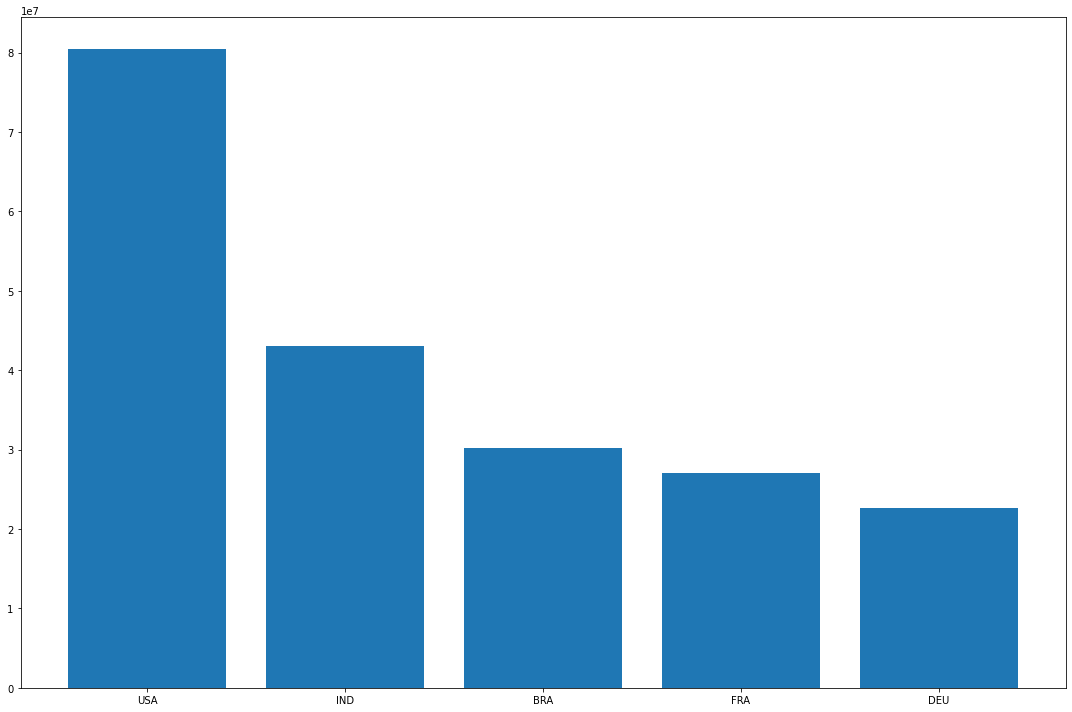

In [ ]:
irrelevantes = [175860,170137,70849,52646,118918, 149130,175860,9350,53456,95544]
df_clean = df.drop(irrelevantes, axis=0)
top_5_total_deaths = df_clean.loc[df.date == '2022-04-10', ['iso_code', 'total_cases']].sort_values(by="total_cases", ascending=False)[0:5]

fig, ax = plt.subplots(figsize=(15,10))


ax.bar('iso_code', 'total_cases', data=top_5_total_deaths)

plt.tight_layout()

Podemos percerber de maneira mais clara agora, como nos Estados unidos, a manifestação do vírus foi muito maior em relação a Índia, o segundo país com mais casos da doença.

Vamos ver agora, nessa mesma linha, o gráfico para os países mais afetados com as mortes pelo Corona. 

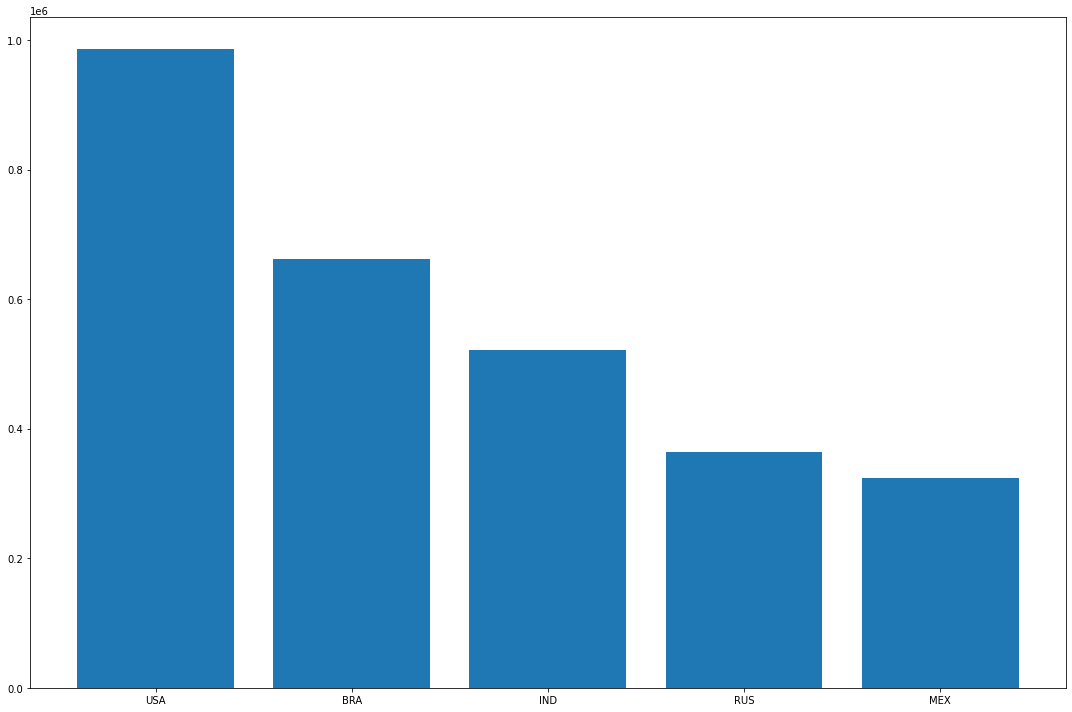

In [ ]:
irrelevantes = [175860,170137,70849,52646,118918, 149130,175860,9350,53456,95544]
df_clean = df.drop(irrelevantes, axis=0)
top_5_total_deaths = df_clean.loc[df.date == '2022-04-10', ['iso_code', 'total_deaths']].sort_values(by="total_deaths", ascending=False)[0:5]

fig, ax = plt.subplots(figsize=(15,10))


ax.bar('iso_code', 'total_deaths', data=top_5_total_deaths)

plt.tight_layout()

Em comparação com os outros países, os Estados Unidos ainda lidera, com o maior número de mortos pela doença.

Outra análise interessante que pode ser feita aqui, é nós entendermos como o vírus se manisfestou ao longo do tempo, em uma escala global. Infelizmente, para esse tipo de doença, sabes que a progressão é exponencial. 

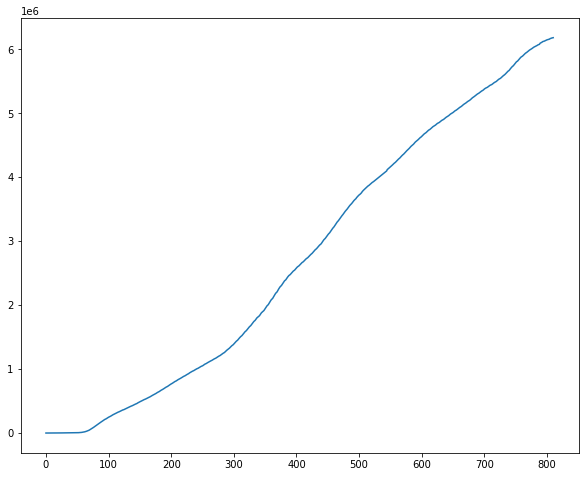

In [ ]:
df.loc[df.location == "World", "total_deaths"].reset_index(drop=True).plot(figsize=(10,8));

Temos um avanço acentuado no número de mortes com o passar do tempo.

## Análise exploratória dos dados do Brasil

A partir do nosso conjunto de dados geral, vamos separar apenas os dados referente ao nosso país.

In [ ]:
df_brasil = df.loc[df.location == "Brazil"].copy()
df_brasil.shape

(776, 67)

Pronto, temos nosso conjuntos de dados apenas para o Brasil.

Vamos agora responder algumas perguntas!

### Quando foi registrada a primeira morte no Brasil por Covid?

Para isso, vamos selecionar a coluna de datas, e verificar quando foi feito o primeiro registro.

In [ ]:
df_brasil.date = pd.to_datetime(df_brasil.date)

df_brasil.sort_values(by="date", ascending=True)[19:40]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
22377,BRA,South America,Brazil,2020-02-26,1.0,1.0,NaN,NaN,NaN,NaN,...,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN,NaN
22378,BRA,South America,Brazil,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN,NaN
22379,BRA,South America,Brazil,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN,NaN
22380,BRA,South America,Brazil,2020-02-29,2.0,1.0,NaN,NaN,NaN,NaN,...,10.1,17.9,NaN,2.2,75.88,0.765,7049.6,3.31,5.25,32.943066
22381,BRA,South America,Brazil,2020-03-01,2.0,0.0,NaN,NaN,NaN,NaN,...,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23148,BRA,South America,Brazil,2022-04-07,30095328.0,26234.0,20522.571,661228.0,248.0,172.286,...,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN,NaN
23149,BRA,South America,Brazil,2022-04-08,30125540.0,30212.0,21003.857,661377.0,149.0,158.857,...,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN,NaN
23150,BRA,South America,Brazil,2022-04-09,30146769.0,21229.0,21599.143,661475.0,98.0,157.714,...,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN,NaN
23151,BRA,South America,Brazil,2022-04-10,30153979.0,7210.0,21599.143,661513.0,38.0,157.571,...,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN,NaN


A partir do resultado obtido, podemos concluir que a primeira morte no Brasil atribuída ao Corona Vírus foi em 17 de Março de 2020, bem no início da Pandemia.

Porém, a partir do conjunto de dados, é possível perceber que o primeiro caso de covid-19 foi registrado em 26 de Fevereiro de 2020! Houve um espaço de tempo entre o primeiro registro de covid, e a primeira morte atribuído a doença.

### Quantos dias demorou para registrarmos a primeira morte de Covid-19, a partir dos primeiros casos?



Como vimos na seção anterior temos que: O primeiro resgistro de covid foi feito dia 26 de fevereiro de 2020, enquanto a primeira morte foi resgistrada em 17 de março, do mesmo ano. Assim, houve um intervalo de aproximadamente 19 dias para o registro da primeira morte de Covid em nosso país. 

Estamos chegando ao fim da nossa análise, por fim, vamos plotar um gráfico para entender melhor como foi a evolução dos númeos de casos e mortes no nosso País.

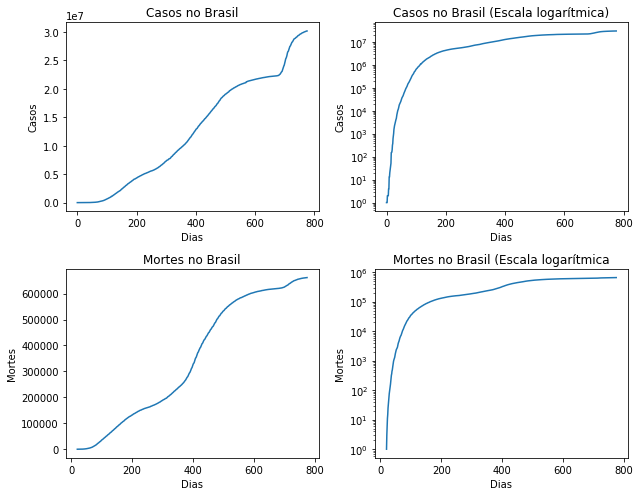

In [ ]:
x = list(range(776))
z = df_brasil['total_cases']
z2 = df_brasil['total_deaths']

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(9, 7))
ax1.set_title('Casos no Brasil')
ax1.set_xlabel('Dias')
ax1.set_ylabel('Casos')
ax1.plot(x, z)

ax2.set_title('Casos no Brasil (Escala logarítmica)')
ax2.set_xlabel('Dias')
ax2.set_ylabel('Casos')
ax2.set_yscale('log')
ax2.plot(x, z)

ax3.set_title('Mortes no Brasil')
ax3.set_xlabel('Dias')
ax3.set_ylabel('Mortes')
ax3.plot(x, z2)

ax4.set_title('Mortes no Brasil (Escala logarítmica')
ax4.set_xlabel('Dias')
ax4.set_ylabel('Mortes')
ax4.set_yscale('log')
ax4.plot(x, z2)
plt.tight_layout()

##Conclusão

Muito, Muito obrigado por ter chego até aqui caro leitor!

Me sinto honrado em poder compartilhar um pouco de conhecimento, ainda mais quando é para tornar essa ciência de alguma maneira mais acessível a todos. 

Nós chegamos ao fim, e com conclusões claras sobre aquilo que estudamos. Hoje entendemos a importância de uma análise exploratória dos dados, e como é importante que ela seja feita logo no começo! Evitamos muitas armadilhas, como colunas co valores quase que todos nulos, variáveis com tipos inadequados e como tratar valos ausentes. 

Aprendemos juntos a entender toda a estrutura do nosso conjunto de dados, quais devem ser as nossas prioridades e o que fazer quando não sabemos mais para onde ir. Lembre-se, faça as perguntas certas!! Não se limite, estude e pesquise em fontes diversas, sites e livros. Keep Going!

Gostaria também de prestar com profundo respeito meus sinceros sentimentos aos familiares de todas as vítimas do Covid-19, infelizmente, perdemos muitas pessoas amandas. A pandemia ainda nao acabou, e todo o cuidado com a nossa saúde é pouco. Por favor, continuem se cuidando, e seguindo as medidas de sergurança. 

Um grande abraço a todos!


"*Dont wast your time, or time will wast you*" - Muse